# Porto Seguro’s Safe Driver Prediction

### 此项目为预测汽车保险索赔概率

## 一、查看数据

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
train_data = pd.read_csv('../data/train.csv')
test_data = pd.read_csv('../data/test.csv')
sample_sub = pd.read_csv('../data/sample_submission.csv')

In [4]:
print(sample_sub.info())
print(sample_sub.head(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 892816 entries, 0 to 892815
Data columns (total 2 columns):
id        892816 non-null int64
target    892816 non-null float64
dtypes: float64(1), int64(1)
memory usage: 13.6 MB
None
   id  target
0   0  0.0364
1   1  0.0364
2   2  0.0364
3   3  0.0364
4   4  0.0364
5   5  0.0364
6   6  0.0364
7   8  0.0364
8  10  0.0364
9  11  0.0364


In [5]:
print(train_data.info())
print(train_data.describe())
print(train_data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 595212 entries, 0 to 595211
Data columns (total 59 columns):
id                595212 non-null int64
target            595212 non-null int64
ps_ind_01         595212 non-null int64
ps_ind_02_cat     595212 non-null int64
ps_ind_03         595212 non-null int64
ps_ind_04_cat     595212 non-null int64
ps_ind_05_cat     595212 non-null int64
ps_ind_06_bin     595212 non-null int64
ps_ind_07_bin     595212 non-null int64
ps_ind_08_bin     595212 non-null int64
ps_ind_09_bin     595212 non-null int64
ps_ind_10_bin     595212 non-null int64
ps_ind_11_bin     595212 non-null int64
ps_ind_12_bin     595212 non-null int64
ps_ind_13_bin     595212 non-null int64
ps_ind_14         595212 non-null int64
ps_ind_15         595212 non-null int64
ps_ind_16_bin     595212 non-null int64
ps_ind_17_bin     595212 non-null int64
ps_ind_18_bin     595212 non-null int64
ps_reg_01         595212 non-null float64
ps_reg_02         595212 non-null float64
ps_re

In [6]:
print(test_data.info())
print(test_data.describe())
print(test_data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 892816 entries, 0 to 892815
Data columns (total 58 columns):
id                892816 non-null int64
ps_ind_01         892816 non-null int64
ps_ind_02_cat     892816 non-null int64
ps_ind_03         892816 non-null int64
ps_ind_04_cat     892816 non-null int64
ps_ind_05_cat     892816 non-null int64
ps_ind_06_bin     892816 non-null int64
ps_ind_07_bin     892816 non-null int64
ps_ind_08_bin     892816 non-null int64
ps_ind_09_bin     892816 non-null int64
ps_ind_10_bin     892816 non-null int64
ps_ind_11_bin     892816 non-null int64
ps_ind_12_bin     892816 non-null int64
ps_ind_13_bin     892816 non-null int64
ps_ind_14         892816 non-null int64
ps_ind_15         892816 non-null int64
ps_ind_16_bin     892816 non-null int64
ps_ind_17_bin     892816 non-null int64
ps_ind_18_bin     892816 non-null int64
ps_reg_01         892816 non-null float64
ps_reg_02         892816 non-null float64
ps_reg_03         892816 non-null float64
ps_

In [43]:
# -1的值为空值，把它变成空值
train_data_null = train_data.copy()
train_data_null[train_data_null == -1] = None
print(train_data_null.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 595212 entries, 0 to 595211
Data columns (total 59 columns):
id                595212 non-null int64
target            595212 non-null int64
ps_ind_01         595212 non-null int64
ps_ind_02_cat     594996 non-null float64
ps_ind_03         595212 non-null int64
ps_ind_04_cat     595129 non-null float64
ps_ind_05_cat     589403 non-null float64
ps_ind_06_bin     595212 non-null int64
ps_ind_07_bin     595212 non-null int64
ps_ind_08_bin     595212 non-null int64
ps_ind_09_bin     595212 non-null int64
ps_ind_10_bin     595212 non-null int64
ps_ind_11_bin     595212 non-null int64
ps_ind_12_bin     595212 non-null int64
ps_ind_13_bin     595212 non-null int64
ps_ind_14         595212 non-null int64
ps_ind_15         595212 non-null int64
ps_ind_16_bin     595212 non-null int64
ps_ind_17_bin     595212 non-null int64
ps_ind_18_bin     595212 non-null int64
ps_reg_01         595212 non-null float64
ps_reg_02         595212 non-null float64

In [44]:
# -1的值为空值，把它变成空值
test_data_null  = train_data.copy()
test_data_null[test_data_null == -1] = None
print(test_data_null.describe())
print(test_data_null.info())

                 id         target      ps_ind_01  ps_ind_02_cat  \
count  5.952120e+05  595212.000000  595212.000000  594996.000000   
mean   7.438036e+05       0.036448       1.900378       1.359799   
std    4.293678e+05       0.187401       1.983789       0.663193   
min    7.000000e+00       0.000000       0.000000       1.000000   
25%    3.719915e+05       0.000000       0.000000       1.000000   
50%    7.435475e+05       0.000000       1.000000       1.000000   
75%    1.115549e+06       0.000000       3.000000       2.000000   
max    1.488027e+06       1.000000       7.000000       4.000000   

           ps_ind_03  ps_ind_04_cat  ps_ind_05_cat  ps_ind_06_bin  \
count  595212.000000  595129.000000  589403.000000  595212.000000   
mean        4.423318       0.416992       0.419038       0.393742   
std         2.699902       0.493062       1.350023       0.488579   
min         0.000000       0.000000       0.000000       0.000000   
25%         2.000000       0.000000       

#### 通过上面可以看出：ps_car_03_cat和ps_car_05_cat数据大量缺失, ps_reg_03部分缺失，其余数据完整或少量缺失

cat - 1: 0.04829778970092766
cat - 0: 0.039537613276558574
cat - -1: 0.03270667824166952


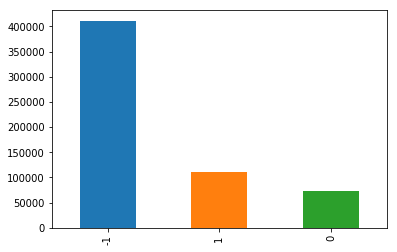

In [31]:
# 查看ps_car_03_cat数据情况
train_data.ps_car_03_cat.value_counts().plot(kind = 'bar')
print('cat - 1:',train_data.target[train_data.ps_car_03_cat==1].mean())
print('cat - 0:',train_data.target[train_data.ps_car_03_cat==0].mean())
print('cat - -1:',train_data.target[train_data.ps_car_03_cat== -1].mean())

cat - 1: 0.04045358985793464
cat - 0: 0.0401105170711694
cat - -1: 0.03170875367190519


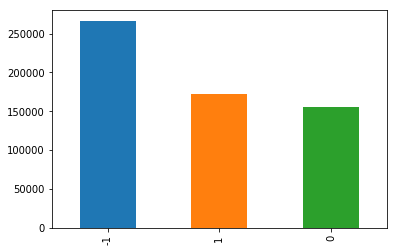

In [32]:
# 查看ps_car_05_cat数据情况
train_data.ps_car_05_cat.value_counts().plot(kind = 'bar')
print('cat - 1:',train_data.target[train_data.ps_car_05_cat==1].mean())
print('cat - 0:',train_data.target[train_data.ps_car_05_cat==0].mean())
print('cat - -1:',train_data.target[train_data.ps_car_05_cat== -1].mean())

count    595212.000000
mean          0.551102
std           0.793506
min          -1.000000
25%           0.525000
50%           0.720677
75%           1.000000
max           4.037945
Name: ps_reg_03, dtype: float64
loss: 0.028393274691014363
normal: 0.03822829476448383


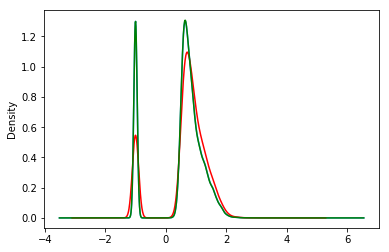

In [33]:
# 查看 ps_reg_03数据情况
print(train_data.ps_reg_03.describe())
plt.figure('ps_reg_03')
# plt.subplot(1,2,1)
# plt.scatter(train_data.ps_reg_03,train_data.target)
loss = train_data.target[train_data.ps_reg_03 < 0].mean()
normal = train_data.target[train_data.ps_reg_03 >= 0].mean()
print('loss:',loss)
print('normal:',normal)
# plt.subplot(1,2,2)
train_data.ps_reg_03.plot(kind='kde',c='dodgerblue')
train_data.ps_reg_03[train_data.target==1].plot(kind='kde',c='red')
train_data.ps_reg_03[train_data.target==0].plot(kind='kde',c='green')

## 填充缺失值
#### ps_car_03_cat、ps_car_05_cat增加新类别项，其余分类特征用众数填充、连续值特征用平均数填充

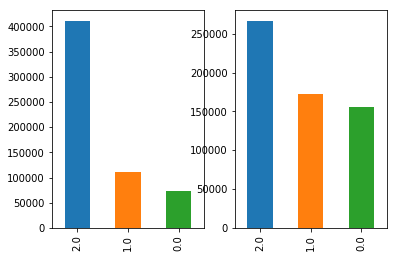

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 595212 entries, 0 to 595211
Data columns (total 59 columns):
id                595212 non-null int64
target            595212 non-null int64
ps_ind_01         595212 non-null int64
ps_ind_02_cat     594996 non-null float64
ps_ind_03         595212 non-null int64
ps_ind_04_cat     595129 non-null float64
ps_ind_05_cat     589403 non-null float64
ps_ind_06_bin     595212 non-null int64
ps_ind_07_bin     595212 non-null int64
ps_ind_08_bin     595212 non-null int64
ps_ind_09_bin     595212 non-null int64
ps_ind_10_bin     595212 non-null int64
ps_ind_11_bin     595212 non-null int64
ps_ind_12_bin     595212 non-null int64
ps_ind_13_bin     595212 non-null int64
ps_ind_14         595212 non-null int64
ps_ind_15         595212 non-null int64
ps_ind_16_bin     595212 non-null int64
ps_ind_17_bin     595212 non-null int64
ps_ind_18_bin     595212 non-null int64
ps_reg_01         595212 non-null float64
ps_reg_02         595212 non-null float64

In [45]:
train_data_null.fillna(value={'ps_car_03_cat':2,'ps_car_05_cat':2},inplace=True)
plt.subplot(1,2,1)
train_data_null.ps_car_03_cat.value_counts().plot(kind = 'bar')
plt.subplot(1,2,2)
train_data_null.ps_car_05_cat.value_counts().plot(kind = 'bar')
plt.show()
test_data_null.fillna(value={'ps_car_03_cat':2,'ps_car_05_cat':2},inplace=True)
print(train_data_null.info())

In [46]:
# 特征名为cat或bin结尾的是离散数据，用众数填充,其余用平均数填充(ps_reg_03暂时也用平均数填充，后续优化)
def fill_data(data):
    Data = data.copy()
    for col in data.columns:
        if (col[-3:] == 'cat') or (col[-3:] == 'bin'):
            Data[col].fillna(data[col].mode(),inplace=True)
        else:
            Data[col].fillna(data[col].mean(),inplace=True)
#     print(Data.info())
    return Data
print(train_data_null.info())
train_data_fill = fill_data(train_data_null)
test_data_fill = fill_data(test_data_null)
print(train_data_fill.info())
print(train_data_fill.describe())
print('----------------------------------------------------------------')
print(test_data_fill.info())
print(test_data_fill.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 595212 entries, 0 to 595211
Data columns (total 59 columns):
id                595212 non-null int64
target            595212 non-null int64
ps_ind_01         595212 non-null int64
ps_ind_02_cat     594996 non-null float64
ps_ind_03         595212 non-null int64
ps_ind_04_cat     595129 non-null float64
ps_ind_05_cat     589403 non-null float64
ps_ind_06_bin     595212 non-null int64
ps_ind_07_bin     595212 non-null int64
ps_ind_08_bin     595212 non-null int64
ps_ind_09_bin     595212 non-null int64
ps_ind_10_bin     595212 non-null int64
ps_ind_11_bin     595212 non-null int64
ps_ind_12_bin     595212 non-null int64
ps_ind_13_bin     595212 non-null int64
ps_ind_14         595212 non-null int64
ps_ind_15         595212 non-null int64
ps_ind_16_bin     595212 non-null int64
ps_ind_17_bin     595212 non-null int64
ps_ind_18_bin     595212 non-null int64
ps_reg_01         595212 non-null float64
ps_reg_02         595212 non-null float64